In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='LLM', ylabel='KG')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM positive, KG negative"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM negative, KG positive"))
        display(df_fn_styler)

In [14]:
experiments = [ experiment for experiment in json.load(open('../experiments/caligraph_gpt-4_description_results.json', 'r')) if "confusion_matrix" in experiment ]

In [15]:
for experiment in experiments:
    ids = {}
    data = []
    for entity in experiment["data"]:
        if entity['id'] in ids:
            print("Duplicate:", entity['id'])
        else:
            ids[entity['id']] = 1
            data.append(entity)
    experiment["data"] = data
    df_results = pd.DataFrame.from_records(data)
    cm = pycm.ConfusionMatrix(df_results["actual"].tolist(), df_results["predicted"].tolist(), digit=2, classes=[ 'positive', 'negative' ])
    experiment["confusion_matrix"] = cm.matrix


Duplicate: http://caligraph.org/resource/Axel_(singer)
Duplicate: http://caligraph.org/resource/Jos%C3%A9_Andr%C3%A9s_Bilibio
Duplicate: http://caligraph.org/resource/Jos%C3%A9_Andr%C3%A9s_Bilibio
Duplicate: http://caligraph.org/resource/Raquel_Forner
Duplicate: http://caligraph.org/resource/Echternach
Duplicate: http://caligraph.org/resource/Diggstown_(TV_series)
Duplicate: http://caligraph.org/resource/The_Amazing_Race_Canada_2
Duplicate: http://caligraph.org/resource/The_Amazing_Race_Canada_2
Duplicate: http://caligraph.org/resource/The_Amazing_Race_Canada_2
Duplicate: http://caligraph.org/resource/Vecinos_(Colombian_TV_series)
Duplicate: http://caligraph.org/resource/Alliance%20of%20Civilizations_(19963273)
Duplicate: http://caligraph.org/resource/Muhammad_az-Zanati
Duplicate: http://caligraph.org/resource/Goh_Chok_Tong
Duplicate: http://caligraph.org/resource/Richard_Fell
Duplicate: http://caligraph.org/resource/Anton_Rop
Duplicate: http://caligraph.org/resource/Konstantinos_Steph

In [16]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC,
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments if pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa != 'None' ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
10,Player of American football from Alabama,1.000000,High,1.000000,0,0,33
9,1921 film,1.000000,High,1.000000,0,0,40
2,Single-camera television sitcom,1.000000,High,1.000000,0,0,35
16,Member of the House of Representatives of Japa...,1.000000,High,1.000000,0,0,40
4,Hill station in India,1.000000,High,1.000000,0,0,36
14,1748 birth,1.000000,High,1.000000,0,0,40
1,Populated place in Luxembourg,1.000000,High,1.000000,0,0,39
7,Medalist at the 2019 Summer Universiade,1.000000,High,1.000000,0,0,40
19,Autobiography,0.950000,High,0.975000,0,1,40
0,Argentine football manager,0.943396,High,0.972222,1,0,36


In [17]:
experiment_df.describe()

,kappa,ACC,FP,FN,POP
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.822039,0.920700,1.550000,1.400000,37.750000
std,0.286789,0.116421,3.501503,2.872739,3.369757
min,-0.066176,0.650000,0.000000,0.000000,29.000000
25%,0.787500,0.893750,0.000000,0.000000,35.750000
50%,0.937800,0.970486,0.000000,0.000000,40.000000
75%,1.000000,1.000000,1.000000,1.250000,40.000000
max,1.000000,1.000000,13.000000,12.000000,40.000000


In [18]:
experiment_df[["FP", "FN"]].sum().sum()

59

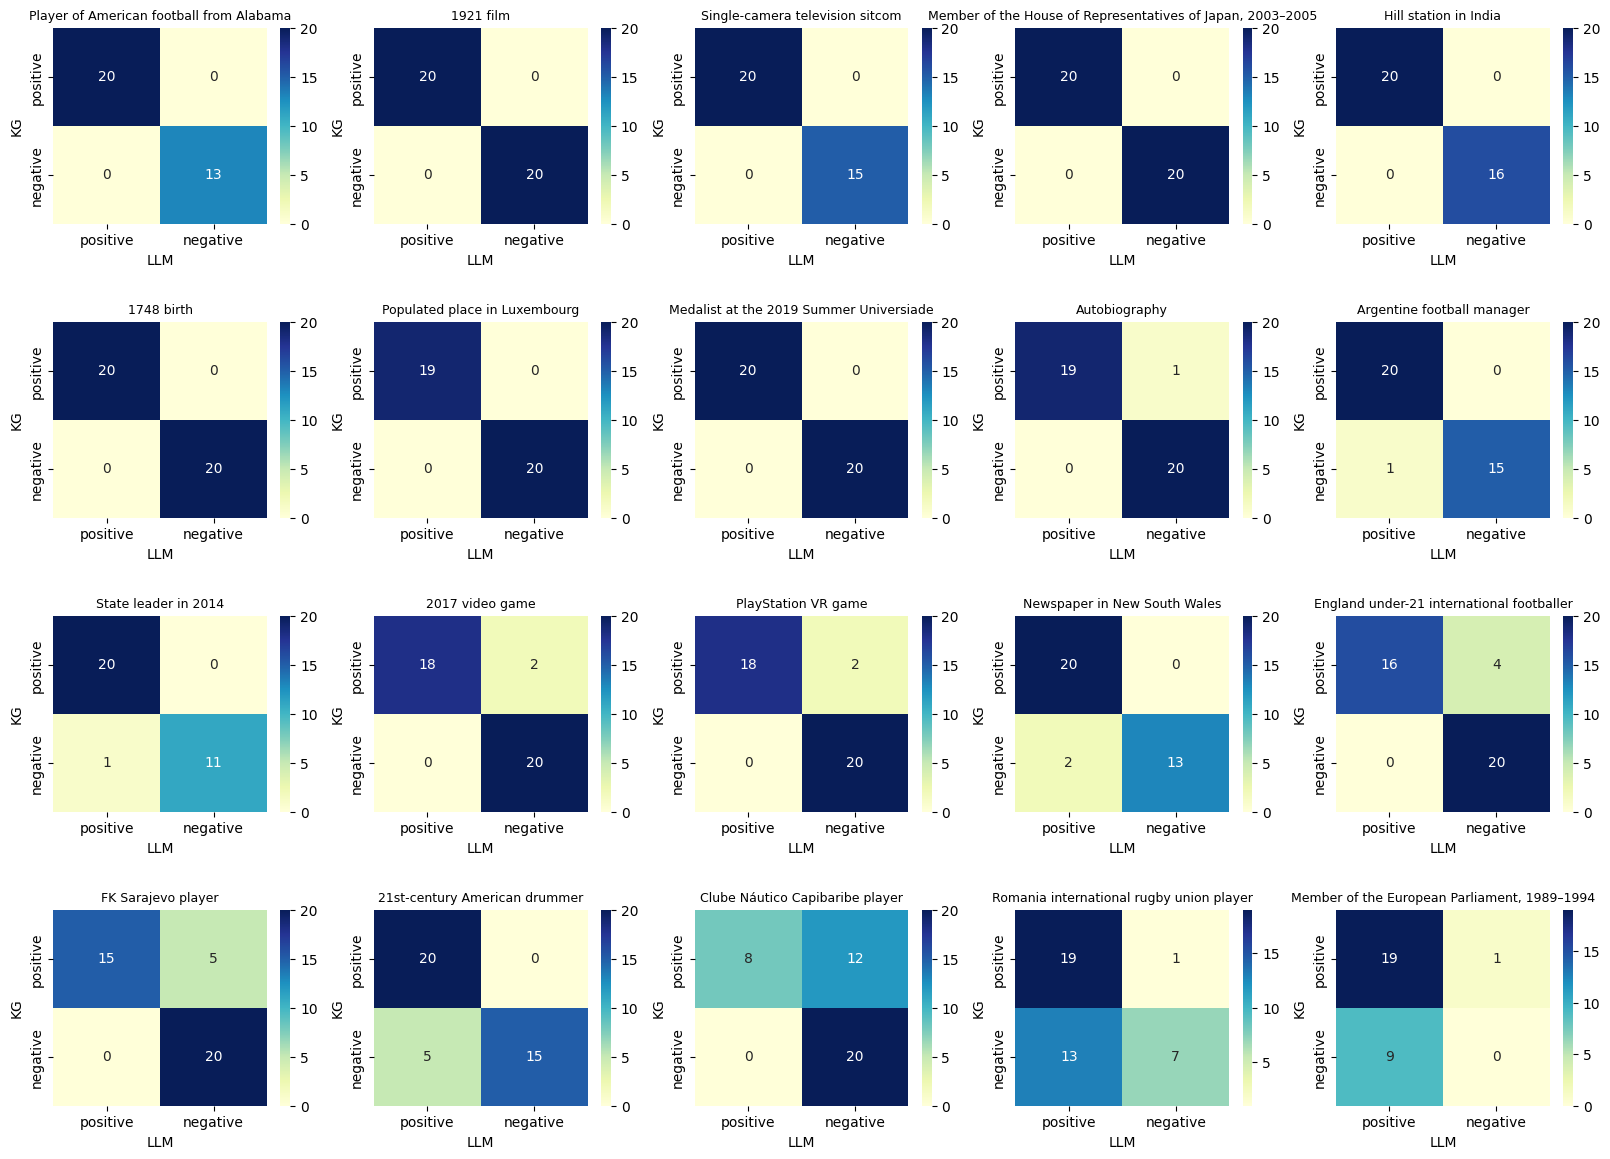

In [19]:
fig = plt.figure(figsize=(20,14))
gs = fig.add_gridspec(4, 5, hspace=0.5)
axes = gs.subplots()
cms = [ (experiment["name"], pycm.ConfusionMatrix(matrix=experiment["experiment"]["confusion_matrix"])) for experiment in experiment_df.to_dict('records')  ]
for ax, (name, cm) in zip(axes.flat, cms):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name, wrap=True, fontsize=9)
    ax.set(xlabel='LLM', ylabel='KG')
for ax in axes.flat[len(cms):]:
    ax.set_visible(False)
plt.show()

## Player of American football from Alabama (http://caligraph.org/ontology/Player_of_American_football_from_Alabama)

The entity "Player of American football from Alabama" is a class in the ontology. This class is a subclass of two other classes: "American player of American football" and "American football person from Alabama". The information about this class was derived from the Wikipedia page "Category:Players_of_American_football_from_Alabama". 

Several individuals are classified under this entity. These include Brendan Burgdorf, Anthony Redmon, Cadillac Williams, Casey Dunn, Chucky Mullins, Gordon Holmes, Richmond Flowers Jr., Sammie Coates, Vince Dooley, Ellis Lankster, J. D. McKissic, Richard Williamson, Tytus Howard, Henry Williams, and Jimmie Ward. These individuals are therefore recognized as players of American football who are from Alabama. This classification suggests that they have a connection to Alabama, likely by birth or residence, and have played American football at some level of competition.

### Confusion matrix

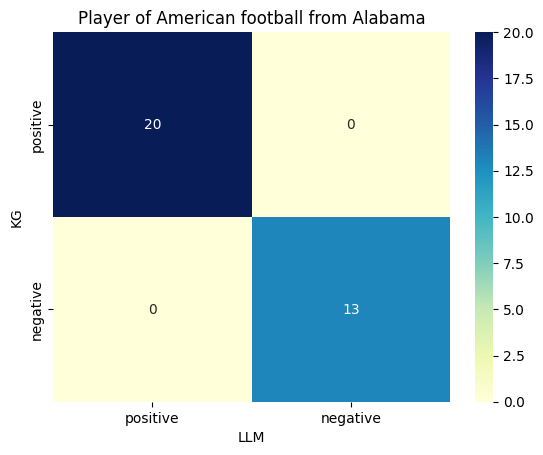

## 1921 film (http://caligraph.org/ontology/1921_film)

The entity "1921 film" is a class within the caligraph.org ontology. It is categorized as a subclass of both "Movie" and "Upcoming film" within the same ontology. The data for this class has been sourced from two Wikipedia pages: "Category:1921 films" and "Category:Lists of 1921 films by country or language". There are numerous instances of this class, which include films such as "Lavender and Old Lace (film)", "Mated in the Wilds", "The Home Stretch", "The Whistle (film)", "A Lowland Cinderella", "Alias Ladyfingers", "General Post", "Hold Your Horses (film)", "No Defense (1921 film)", "School Days (1921 film)", "The Bell Hop", "The Films of Princess Fantoche", "The Flat (1921 film)", and "The Golden Snare". Each of these films is classified as a "1921 film" within the caligraph.org ontology.

### Confusion matrix

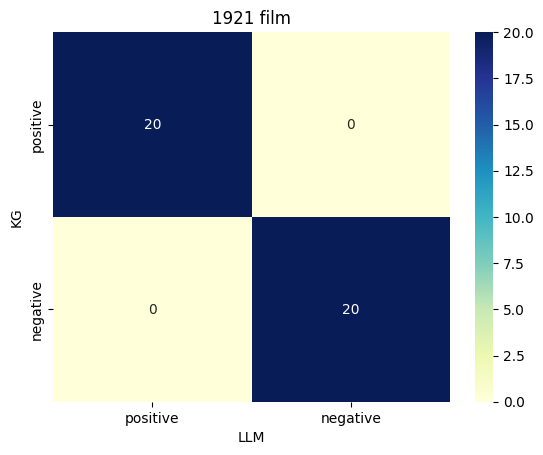

## Single-camera television sitcom (http://caligraph.org/ontology/Single-camera_television_sitcom)

The entity "Single-camera television sitcom" is classified as a type of class within the ontology. It is further categorized as a subclass of both "Television show" and "Sitcom," indicating that it shares certain characteristics with these broader categories. The information about this entity has been derived from two Wikipedia sources: "Category:Single-camera television sitcoms" and "List of single-camera situation comedies." There are numerous instances of this entity, which are represented as resources. These include "Great News," "The Patty Duke Show," "The Smothers Brothers Show," "Blandings (TV series)," "Kaya (TV series)," "Næturvaktin," "Cooper Barrett's Guide to Surviving Life," "Hatching, Matching and Dispatching," "Head Case," "Lockie Leonard (TV series)," "Tabitha (TV series)," "Andi Mack," "Black-ish," and "Powerless (TV series)." Each of these resources is classified as a type of "Single-camera television sitcom," indicating that they all share the characteristics of this specific class.

### Confusion matrix

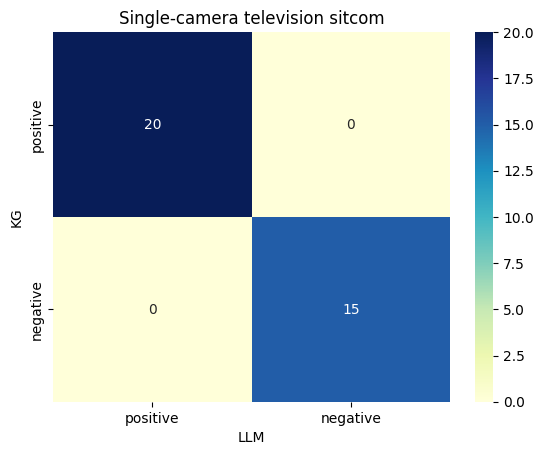

## Member of the House of Representatives of Japan, 2003–2005 (http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005)

The entity "Member of the House of Representatives of Japan, 2003–2005" is a class in the ontology. It is a subclass of the broader class "Thing". The information about this class has been derived from the Wikipedia page titled "List of members of the House of Representatives of Japan, 2003–2005". 

There are several individuals who are categorized under this class. These individuals include Ikuo Horigome, Kinya Narazaki, Miyoko Hida, Takashi Aoyama, Kenji Kosaka, Yoshirō Mori, Kenji Kobayashi, Ren Sato, Sadakazu Tanigaki, Tadahiro Matsushita, Yasuko Ikenobō, Yuriko Koike, Kansei Nakano, Koichi Takemasa, Kenichi Mizuno, and Masashi Nakano. These individuals were all members of the House of Representatives of Japan during the period from 2003 to 2005, as indicated by their classification under this entity.

### Confusion matrix

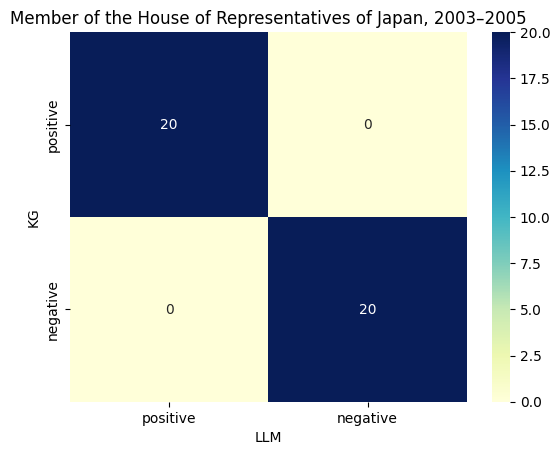

## Hill station in India (http://caligraph.org/ontology/Hill_station_in_India)

The entity "Hill station in India" is classified as a "Class" in the RDF syntax namespace. It is labeled as "Hill station in India" and is a subclass of three other entities: "Place in India", "Hill station", and "RestrictionHasValue_country_India". This suggests that it is a specific type of place in India, which is a hill station, and is associated with the country India. The information about this entity is derived from several Wikipedia pages, including "List of hill stations in India", "Category:Hill stations in India", and "Category:Hill stations in India by state or union territory".

There are several resources that are classified as instances of the "Hill station in India" class. These include "Kakkadampoyil", "Noney", "Ganjam district", "Koraput", "Navamalai", "Mothugudem", "Naneghat", "Chathurangapara", "Manjampatti Valley", "Mannavanur", "Nidh (17182649)", and "Puthur (17188693)". These resources are likely specific hill stations located in different regions of India.

### Confusion matrix

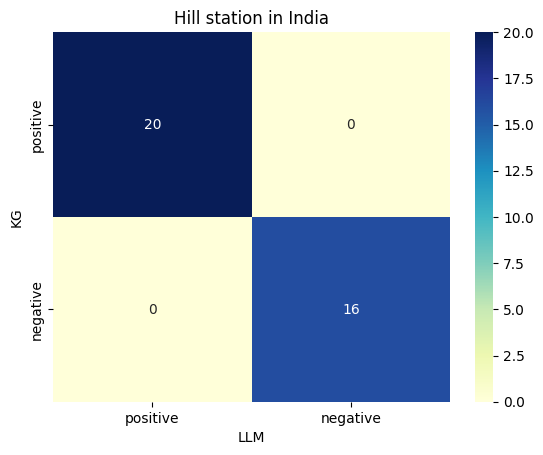

## 1748 birth (http://caligraph.org/ontology/1748_birth)

The entity "1748 birth" is a class within the Caligraph ontology. It is a subclass of both "RestrictionHasValue_birthYear_1748" and "1740s_birth", indicating that it pertains to individuals born in the year 1748, within the decade of the 1740s. The class was derived from the Wikipedia category "1748 births". 

The class "1748 birth" encompasses a number of individuals. These include August Friedrich Pfeiffer, Francisco Javier Mier Campillo, Philippe I Louis van de Werve, 1st Baron of Schilde, Thomas Johnes, William Holbech (MP), Antoine Graincourt, Henry Sherburne (colonel), Maximilian von Alopaeus, Francesco Azopardi, Hugh Henry Brackenridge, José Lidón, John Ramage (artist), Patrick Craufurd Bruce, Gilbert Rodman (born 1748), and Jeremiah Chase. Each of these individuals is classified under the type "1748 birth", signifying their birth in the year 1748.

### Confusion matrix

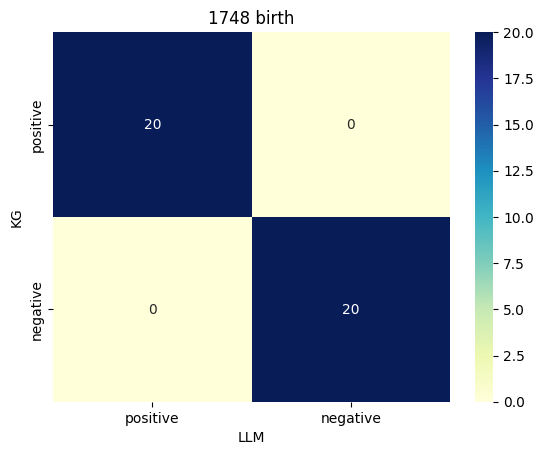

## Populated place in Luxembourg (http://caligraph.org/ontology/Populated_place_in_Luxembourg)

The entity "Populated place in Luxembourg" is a class within the RDF syntax. It is labeled as "Populated place in Luxembourg" and is a subclass of the broader category "Populated place in Europe". The information about this class is derived from two Wikipedia sources: "Category:Populated places in Luxembourg" and "List of populated places in Luxembourg". 

This class includes several instances, each representing a different populated place in Luxembourg. These instances include "Bleesmillen (19500076)", "Hemstal (19500778)", "Pafebruch (19764711)", "Simmerfarm (19759809)", "Löftgermillen (19981928)", "Cents, Luxembourg", "Schwebach", "Kaesfurt (17178379)", "Neumühle (17273401)", "Theinshaff (17434441)", "Kohnenhaff (18547048)", "Stoppelhaff (18549892)", "Heisbich (18973008)", "Lauterborn (18980569)", and "Féischterbierg (19066717)". Each of these instances is classified under the type "Populated place in Luxembourg", indicating that they are all populated places located within the country of Luxembourg.

### Confusion matrix

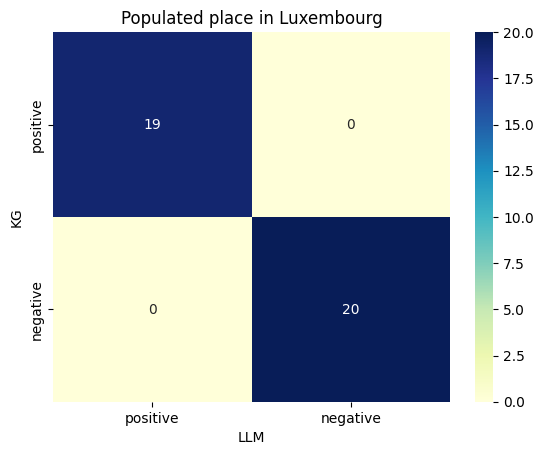

## Medalist at the 2019 Summer Universiade (http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade)

The entity "Medalist at the 2019 Summer Universiade" is a class within the ontology of a knowledge graph. It is a subclass of the "Athlete" class, indicating that it represents a specific category of athletes. The creation of this class was inspired by the Wikipedia category "Medalists at the 2019 Summer Universiade". 

There are numerous individuals who are classified under this entity, signifying that they are athletes who have won a medal at the 2019 Summer Universiade. These individuals include Lauren Scherf, Ben Broeders, Lara McSpadden, Liveta Jasiūnaitė, Nana Adoma Owusu-Afriyie, Yann Randrianasolo, Dean Farris, Júlio Ferreira, Lee Pei-chi, Guillaume Bianchi, Yang Kun-pi, Alessia Russo (a gymnast), Renée Lucht, Sung Hyang-sim, Tang Chia-hung, and Yu Ziyang.

### Confusion matrix

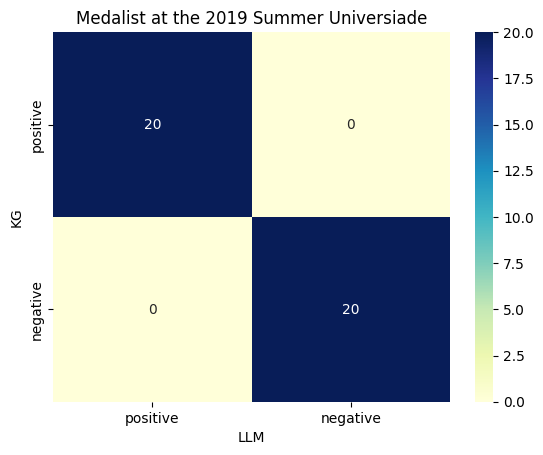

## Autobiography (http://caligraph.org/ontology/Autobiography)

The entity "Autobiography" is a class within the knowledge graph. It falls under the broader category of "Biography (books)", making it a subclass. The label assigned to this entity is "Autobiography". The information about this entity has been derived from several Wikipedia pages, including "Category:Autobiographies", "Category:Autobiographies by nationality", and "List of autobiographies". 

There are numerous resources that fall under the "Autobiography" class. These include "Only Fools and Stories", "Tall, Dark & Gruesome", "Humble Pie", "I Flew for the Führer", "Joys and Sorrows: Reflections", "Lessons From a Life in Feathers", "The Autobiography of Nikola Tesla", "Visibility Unlimited", "WHAM!, George Michael, & Me", "Do You Want to Go With Me?", "And the Beat Goes On", "Anna Sui", "Nine Lives", and "The Land I Lost". Each of these resources is classified as an "Autobiography" in the knowledge graph.

### Confusion matrix

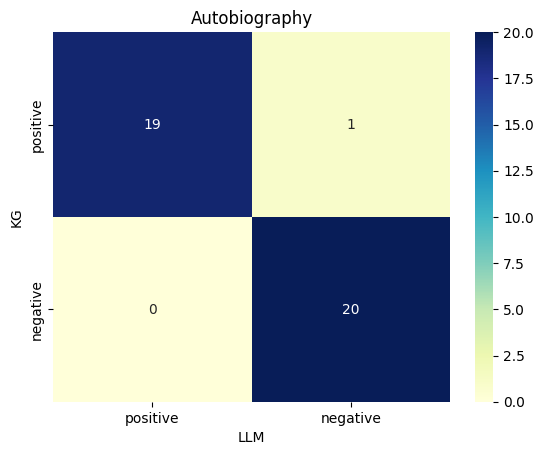

### LLM negative, KG positive

label,description,rationale
And the Beat Goes On (The Whispers song),"""And the Beat Goes On"" is a song by The Whispers, classified as a named individual in the knowledge graph. Released as a single in 1979, it is categorized as a 1979 single, a 1979 song, a post-disco song, a SOLAR Records single, a song written by Leon Sylvers III, and a song by The Whispers. The song falls under the genre of post-disco, dance music, and rhythm and blues. It is part of The Whispers' album and was a top-ten single in the UK in 1980. The song is also known by alternative labels such as ""And The Beat Goes On"". It is also linked to the same entity in the DBpedia knowledge base.","Based on the provided definition and information, there is no valid argument to classify ""And the Beat Goes On"" (The Whispers song) as an Autobiography. The song is a musical piece by The Whispers, not a written account of a person's life, which is the definition of an Autobiography. The song does not fall under the ""Autobiography"" class in the knowledge graph, and there is no information suggesting that it is a self-written account of the lives of The Whispers. Therefore, it cannot be classified as an Autobiography."


## Argentine football manager (http://caligraph.org/ontology/Argentine_football_manager)

The entity "Argentine football manager" is a class within an ontology. This class is a specific type of Argentine sports coach and Football manager in Argentina, indicating that it refers to individuals who manage football teams and were born in Argentina. The source of this information is the Wikipedia page for Argentine football managers.

There are several individuals who are classified under this entity. These include Horacio Bongiovanni, José García Pérez, José Varacka, Lucas Ochandorena, Hector Alfredo D'Angelo, Juan Brown, Juan Quarterone, Rubén Darío Insúa, Juan Carlos Sarnari, Mauro Navas, Héctor Rial, Iván Sopegno, Marcelo Trobbiani, and Rodolfo Motta. Each of these individuals is an Argentine football manager, as per the classification in this ontology.

### Confusion matrix

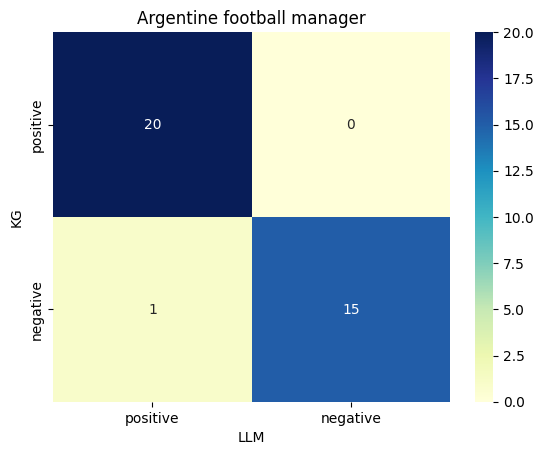

### LLM positive, KG negative

label,description,rationale
Héctor Gabriel Morales,"Héctor Gabriel Morales, also known as ""Morales"", ""H. Morales"", and ""Hector Morales"", is an Argentine individual born in 1989 from Corrientes Province. He is a sportsperson who has played football for Estudiantes de La Plata and Ferencvárosi TC, and has also worked as an association football manager. He is an Argentine expatriate sportsperson who has lived in Hungary and has been an expatriate footballer in both Hungary and Honduras. He has played in the Honduran Liga Nacional as a foreign player for C.D. Victoria.","Héctor Gabriel Morales fits the definition of an Argentine football manager as he is an individual born in Argentina, specifically in Corrientes Province, and has worked as an association football manager. This aligns with the definition of an Argentine football manager as an individual who manages football teams and was born in Argentina. Therefore, based on the provided definition and information, Héctor Gabriel Morales can be classified as an Argentine football manager."


## State leader in 2014 (http://caligraph.org/ontology/State_leader_in_2014)

The entity "State leader in 2014" is a class within the Caligraph knowledge graph's ontology. It is a specific subclass of the broader "State leader" class. The information for this entity is derived from the Wikipedia page titled "List of state leaders in 2014". 

This class includes several individuals who were state leaders in 2014. These individuals are 'Akilisi Pōhiva, Armando Guebuza, Barry Haase, Hovik Abrahamyan, Michael Dunkley, Miloš Zeman, Nicos Anastasiades, Omar al-Hassi, Tsakhiagiin Elbegdorj, Adam Wood, Beji Caid Essebsi, Harold Martin, Jorge Carlos Fonseca, Joyce Banda, Mikhail Myasnikovich, and Hassan Rouhani. Each of these individuals is classified as an instance of the "State leader in 2014" class, indicating their role as state leaders during that year.

### Confusion matrix

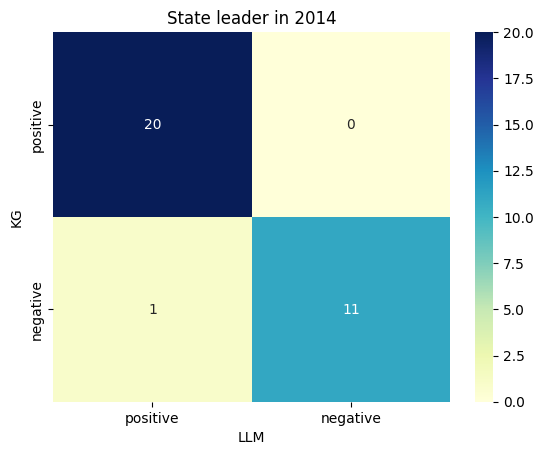

### LLM positive, KG negative

label,description,rationale
Zlatko Lagumdžija,"Zlatko Lagumdžija, also known as ""Lagumdžija"", is a Bosniak individual who was born in 1955 and is currently living. He hails from Sarajevo, Bosnia and Herzegovina. He has had a significant political career, serving as the Foreign Minister of Bosnia and Herzegovina in several years, including 2001, 2002, 2012, 2013, 2014, and 2015. In addition to his role as Foreign Minister, he also held a position as a state leader in 2001 and 2002. His contributions and roles have led to his recognition as a notable Bosniak of Bosnia and Herzegovina and a prominent politician from Sarajevo.","The definition of ""State leader in 2014"" includes individuals who held a position as a state leader during the year 2014. Zlatko Lagumdžija served as the Foreign Minister of Bosnia and Herzegovina in 2014, which is a significant political role in the state. Therefore, based on the information provided, it can be argued that Zlatko Lagumdžija fits the definition of a ""State leader in 2014""."


## 2017 video game (http://caligraph.org/ontology/2017_video_game)

The entity "2017 video game" is a class within the ontology. It is a subclass of both "The art" and "Video game", indicating that it is a specific type of both art and video game. The class was derived from the Wikipedia category "2017 video games". There are numerous instances of this class, which are individual video games released in 2017. These include "Our World is Ended", "Atomega", "Final Fantasy XV", "Fortnite", "Hiveswap", "Road Rage (video game)", "Buck (video game)", "Football Manager 2018", "Blackwood Crossing", "DJMax Respect", "Fire Pro Wrestling World", "Sundered", "Creeping Terror (video game)", "DeadTruth: The Dark Path Ahead", and "Puzzle Fighter (2017 video game)". Each of these instances is a specific example of a 2017 video game.

### Confusion matrix

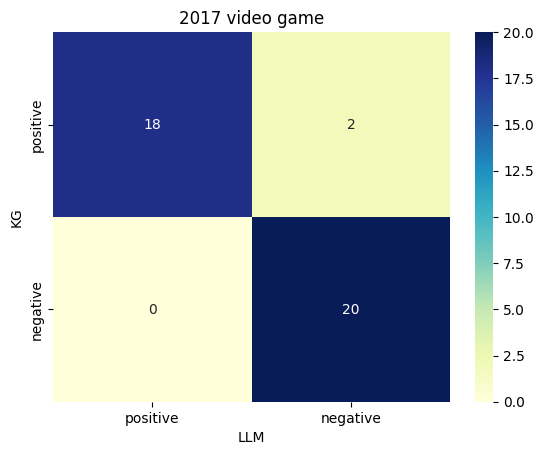

### LLM negative, KG positive

label,description,rationale
The Shrouded Isle,"The Shrouded Isle is a named individual entity, specifically an indie video game, in the knowledge graph. It was developed in Canada by Kitfox Games, who also published the game. The Shrouded Isle is a simulation video game, more specifically a construction and management simulation game. It was released on January 17, 2019. The game is available on several platforms including Microsoft Windows, MacOS, and Nintendo Switch. It is categorized as a MacO game, a Nintendo Switch game, a Windows game, and a 2017 video game. The game is also recognized as being based on works by H.P. Lovecraft. In the DBpedia resource, The Shrouded Isle is identified as the same entity.","The Shrouded Isle cannot be classified as a 2017 video game based on the provided definition and information. The definition of a 2017 video game is a video game that was released in the year 2017. However, the information provided about The Shrouded Isle states that it was released on January 17, 2019, which is not within the year 2017. Therefore, despite being a video game, The Shrouded Isle does not meet the criteria to be classified as a 2017 video game."
Wolfenstein II: The New Colossus,"Wolfenstein II: The New Colossus is a video game that encompasses a wide range of themes and settings. It is a video game about Nazis, featuring a storyline that involves experimental medical treatment. The game is set in various locations, including Texas, Washington, D.C., New Mexico, Los Angeles, Alaska, and Kansas, and also includes settings in the year 1961, on the planet Venus, and on the Moon. The game's score is composed by Mick Gordon. It falls under the category of retrofuturistic video games and is also classified as an action-adventure game. The game presents an alternate history fiction and is a product of Bethesda Softworks. It is a first-person shooter game. Additionally, it is categorized under film and movie, indicating that it may contain cinematic elements or have been adapted into a film or movie.","The definition of a 2017 video game is a specific type of art and video game that was released in the year 2017. While the description of the entity Wolfenstein II: The New Colossus does not explicitly state the year of its release, it does provide detailed information about the game's themes, settings, and genre, which align with the characteristics of a video game. Therefore, if we can confirm that Wolfenstein II: The New Colossus was indeed released in 2017, it would fit the definition of a 2017 video game. However, based on the information provided in the definition and description, we cannot definitively assert that Wolfenstein II: The New Colossus is a 2017 video game without additional information about its release date."


## PlayStation VR game (http://caligraph.org/ontology/PlayStation_VR_game)

The entity "PlayStation VR game" is a class within a knowledge graph ontology. It is a subclass of both "Video game with stereoscopic 3D graphics" and "Virtual reality game", indicating that games within this class feature both stereoscopic 3D graphics and virtual reality elements. The information about this class has been derived from the Wikipedia pages for "PlayStation VR games" and "List of PlayStation VR games".

There are numerous instances or resources that belong to this class, all of which are PlayStation VR games. These include "The Mofflys: Invasion Mayhem", "Dying: Reborn", "Kitten'd", "Mixip", "Summer Lesson", "The Wizards: Enhanced Edition", "The Virtual Orchestra (Premium)", "Gods (video game)", "Pollen (video game)", "The Walking Dead: Saints & Sinners", "The Persistence", "Cooking Simulator", "Doom (1993 video game)", and "Esper Dream". Each of these instances is a PlayStation VR game, indicating that they are video games designed to be played on the PlayStation VR platform, and they likely feature stereoscopic 3D graphics and virtual reality gameplay.

### Confusion matrix

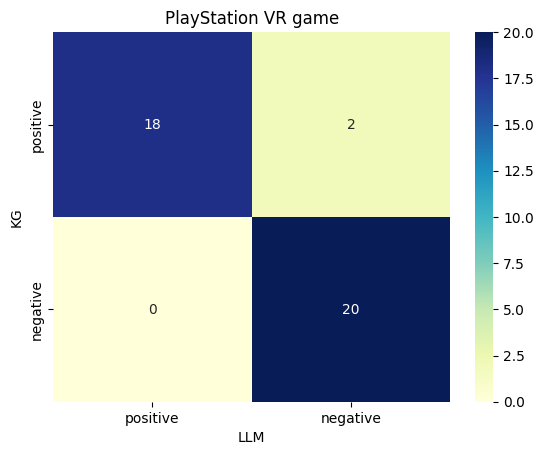

### LLM negative, KG positive

label,description,rationale
Gods (video game),"""Gods (video game)"" is a single-player platform game that was released in 1991. It was developed by The Bitmap Brothers and published by Strategy First and Mindscape. The game's score was composed by David Whittaker and Richard Joseph. It is part of a platform game series and is based on Greek mythology, with its setting in antiquity. The game was developed in the United Kingdom and is available on various platforms including Amiga, DOS, PC-98, and Super Nintendo Entertainment System. It also has a remastered port for the Wii U. The game is compatible with the MT-32 MIDI sound module.","Based on the provided definition and information, there is no evidence to support the assertion that ""Gods (video game)"" is a PlayStation VR game. The definition of a PlayStation VR game is a video game designed to be played on the PlayStation VR platform, featuring stereoscopic 3D graphics and virtual reality gameplay. However, the description of ""Gods (video game)"" does not mention any of these characteristics. It does not state that the game was designed for the PlayStation VR platform, nor does it mention the presence of stereoscopic 3D graphics or virtual reality gameplay. Therefore, based on the provided information, it cannot be argued that ""Gods (video game)"" is a PlayStation VR game."
Eve Online,Eve Online is a space opera medium and an active massively multiplayer online game that supports cross-platform play. It was developed in Iceland and introduced as a video game franchise in 2003. The game is set in a science fiction universe and is recognized as a named individual. Eve Online is also classified as a 2003 video game and an Atari SA video game. It falls under the category of business simulation video games and is also categorized as an erotic video game. Eve Online is a free PC game that is also available on MacO. It was developed using Python software and is a space flight simulation game. The game has expansion packs and features a virtual economy. It is a Windows game and supports cross-platform play. Eve Online is also recognized as a 2010s video game and a video game developed in Iceland. It is part of a video game franchise introduced in 2003 and is set in a science fiction universe.,"Based on the provided definition and information, there is no evidence to support the assertion that Eve Online is a PlayStation VR game. The definition specifies that PlayStation VR games are video games designed to be played on the PlayStation VR platform, and likely feature stereoscopic 3D graphics and virtual reality gameplay. However, the description of Eve Online does not mention any of these characteristics. It does not state that the game is designed for the PlayStation VR platform, nor does it mention the presence of stereoscopic 3D graphics or virtual reality gameplay. Therefore, based on the provided information, it cannot be argued that Eve Online is a PlayStation VR game."


## Newspaper in New South Wales (http://caligraph.org/ontology/Newspaper_in_New_South_Wales)

The entity "Newspaper in New South Wales" is a class in the ontology. It is a subclass of the broader class "Newspaper published in Australia". The information about this class is derived from the Wikipedia page "List of newspapers in New South Wales". There are numerous resources that fall under this class. These include newspapers such as "Imlay magnet", "Springwood Sentinel", "The Coastal Views", "The Gilgandra Weekly", "The Inverell Argus", "The St George Observer", "Duncan's weekly register of politics, facts and general literature", "Stageland", "The Moss Vale record", "Newcastle Star", "Tenterfield Intercolonial Courier and Fairfield and Wallangarra Advocate", "Moree Champion", "Dubbo", "Oceania (journal)", "The Mirror of Australia", and "The Northern Times". Each of these resources is classified as a type of "Newspaper in New South Wales".

### Confusion matrix

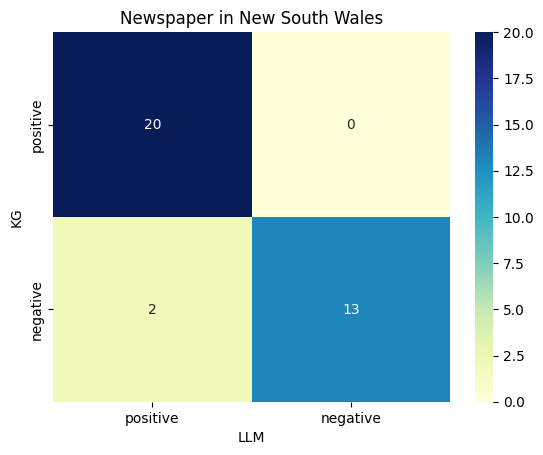

### LLM positive, KG negative

label,description,rationale
Parramatta Advertiser,"The Parramatta Advertiser is a weekly newspaper published in Sydney, Australia. It is recognized as a named individual in the ontology and is also identified as the same entity in the DBpedia resource. The newspaper is commonly referred to as the ""Parramatta Advertiser"". It adopts a tabloid format and is accessible in both online and offline mediums. The Parramatta Advertiser was established on July 15, 1933. Its headquarters are situated in Parramatta, a suburb of Sydney, in the state of New South Wales, Australia. The newspaper is owned by a company called NewsLocal. The information about the Parramatta Advertiser has been sourced from the Wikipedia pages for ""Newspapers published in Sydney"" and ""NewsLocal"".","The Parramatta Advertiser fits the definition of a ""Newspaper in New South Wales"" as it is a newspaper that is published in the state of New South Wales, Australia. Specifically, it is headquartered in Parramatta, a suburb of Sydney, which is located in New South Wales. Furthermore, it is a named individual in the ontology, which suggests that it is recognized as a distinct entity within the class of ""Newspaper in New South Wales"". Therefore, based on the provided definition and information, it can be argued that the Parramatta Advertiser is a ""Newspaper in New South Wales""."
The Free Thought,"The Free Thought is a Ukrainian-language newspaper published in Sydney, Australia. It was first published in 1949, making it an establishment of that year in Australia. The newspaper is not only classified as a non-English language newspaper but also as a Ukrainian publisher. It has a circulation of 1500 copies. The Free Thought follows the ISO 216 standard for its format. The headquarters of the newspaper is located in Sydney, New South Wales, specifically in the suburb of Lidcombe. The newspaper is also known by its Ukrainian names, ""Vil'na dumka"" and ""Vil`na Dumka"". The newspaper was founded on July 10, 1949, and its first publication also occurred in the same year. The Free Thought is also recognized as a named individual in the ontology.","The Free Thought is a newspaper that is published in Sydney, which is located in New South Wales, Australia. According to the definition provided, a ""Newspaper in New South Wales"" is a subclass of the broader class ""Newspaper published in Australia"" and includes any newspaper published in the region of New South Wales. Therefore, since The Free Thought is a newspaper published in Sydney, New South Wales, it fits the criteria and can be classified as a ""Newspaper in New South Wales""."


## England under-21 international footballer (http://caligraph.org/ontology/England_under-21_international_footballer)

The entity "England under-21 international footballer" is a class within the Caligraph ontology. This class is a subclass of three other classes: "RestrictionHasValue_team_England national under-21 football team", "England youth international footballer", and "National under-21 association football team". The information about this class was derived from the Wikipedia page "Category:England under-21 international footballers". 

There are several individuals who are classified as "England under-21 international footballers". These include Garry Parker, Patrick Bamford, Paul Gascoigne, Ray Wilkins, Rod Wallace, Brian Atkinson, Chris Woods, Daniel Sturridge, Garry Flitcroft, Gary Mills (a footballer born in 1961), Hayden Mullins, Jason Steele (a footballer), Martyn Waghorn, and Trevor Benjamin. Each of these individuals is an instance of the "England under-21 international footballer" class in the Caligraph ontology.

### Confusion matrix

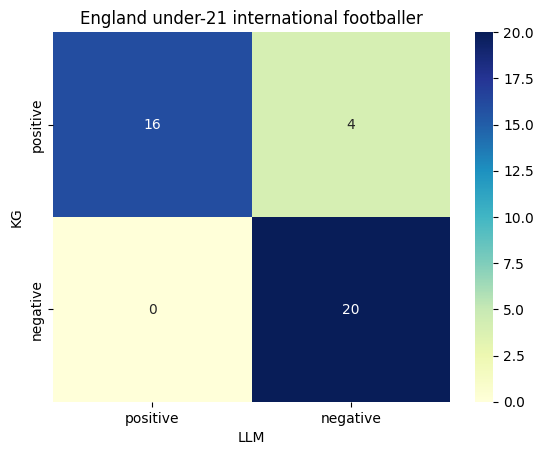

### LLM negative, KG positive

label,description,rationale
Hayden Mullins,"Hayden Mullins, born in 1979, is a living Black British sportsperson from Reading, Berkshire. He has had a diverse career in football, both as a player and a manager. As a player, he has been associated with several clubs including Birmingham City F.C., Crystal Palace F.C., Notts County F.C., Portsmouth F.C., and Reading F.C. He has played in various positions, primarily as an association football midfielder and an association football utility player. His playing career spans the English Football League and the Premier League, and he has also participated in the FA Cup Final. As a manager, he has led Watford F.C. and Colchester United F.C. His contributions to football have made him a notable figure in the sport.","The definition of ""England under-21 international footballer"" states that it includes individuals who have played for the England national under-21 football team. While the description of Hayden Mullins provides detailed information about his football career, it does not explicitly state that he has played for the England national under-21 football team. Therefore, based solely on the information provided in the definition and description, we cannot definitively assert that Hayden Mullins is an ""England under-21 international footballer""."
Trevor Benjamin,"Trevor Benjamin is a named individual, born in 1979, who is of Jamaican descent. He has had a significant career in English football, both as a player and a manager. As a player, he has been associated with numerous football clubs, including Bedlington Terriers F.C., Brighton & Hove Albion F.C., Cambridge United F.C., Coventry City F.C., Crystal Palace F.C., Gainsborough Trinity F.C., Gillingham F.C., Hednesford Town F.C., and Hereford United F.C. His career spans across different leagues, having played in the English Football League and the Premier League, where he has also scored goals. As a manager, he has contributed to the English football scene. Internationally, he has represented Jamaica, making him a Jamaica international footballer and a Jamaican expatriate footballer.","The provided definition does not offer any direct evidence or information that Trevor Benjamin is an England under-21 international footballer. While it is mentioned that he has had a significant career in English football, there is no specific mention of him playing for the England under-21 national team. Therefore, based solely on the given information, it cannot be asserted that Trevor Benjamin is an England under-21 international footballer."
Ashley Cole,"Ashley Cole is a notable individual who was born in 1980 in the London Borough of Tower Hamlets. He is of Barbadian Briton descent, making him an Eastern Caribbean person. Cole is best known for his career as a footballer, specifically as a fullback, originating from Stepney. His football career includes playing in the 2002 and 2006 FIFA World Cup and being a player for several football clubs including A.S. Roma, Arsenal F.C., Chelsea F.C., Crystal Palace F.C., and Derby County F.C. Beyond his playing career, Cole has also made a name for himself as an association football coach. He has played in the English Football League and has spent time as an English expatriate footballer and sportsperson in the United States. Off the field, Cole has a sponsorship deal with Adidas.","The provided definition and description do not provide sufficient evidence to assert that Ashley Cole is an England under-21 international footballer. While it is clear that Ashley Cole is a notable footballer and has played for several clubs, there is no specific mention of him playing for the England national under-21 football team, which is a requirement to be classified as an ""England under-21 international footballer"" according to the provided definition. Therefore, based on the given information, we cannot assert that Ashley Cole is an England under-21 international footballer."
Fikayo Tomori,"Fikayo Tomori is

## FK Sarajevo player (http://caligraph.org/ontology/FK_Sarajevo_player)

The entity "FK Sarajevo player" is a class within the ontology, specifically labeled as "FK Sarajevo player". It is a subclass of several other classes, including "RestrictionHasValue_team_FK Sarajevo", "Footballer in Bosnia and Herzegovina", and "Association football player in Bosnia and Herzegovina". This suggests that the class "FK Sarajevo player" is a specific type of football player who is associated with the team FK Sarajevo in Bosnia and Herzegovina. 

The information for this entity was derived from two Wikipedia pages: "Category:FK Sarajevo players" and "List of FK Sarajevo players". This suggests that the data for this class was gathered from these pages and includes all players listed there.

Several individuals are classified under this entity, indicating that they are or were players for FK Sarajevo. These individuals include Branislav Arsenijević, Sead Jesenković, Darko Raca, Franjo Vuleta, Ibrahim Biogradlić, Vule Trivunović, Sretko Vuksanović, Vukašin Višnjevac, Marko Savić, Frank Liivak, Matej Kochan, Safet Nadarević, and Said Fazlagić. Each of these individuals is classified as an "FK Sarajevo player", reinforcing their association with this specific football team.

### Confusion matrix

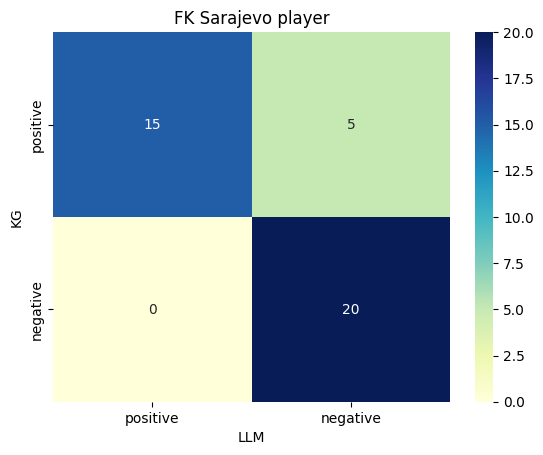

### LLM negative, KG positive

label,description,rationale
Darko Raca,"Darko Raca is a named individual, born in 1977, who is a professional football defender from Bosnia and Herzegovina. He has played for several football clubs including FK Sloboda Tuzla, FK ČSK Čelarevo, FK Kozara Gradiška, and FK Laktaši. His career has seen him play in various leagues such as the Serbian First League, Division 2 of Swedish football, and Ettan Fotboll. Darko Raca is not only recognized as an expatriate footballer who has played in Serbia, Serbia and Montenegro, and Sweden, but also as a Bosnia and Herzegovina expatriate sportsperson in these countries. He is further categorized as a foreign football player in Serbia. Darko Raca, a living person, hails from Sarajevo.","The definition of an ""FK Sarajevo player"" is a specific type of football player who is associated with the team FK Sarajevo in Bosnia and Herzegovina. However, based on the information provided in the definition, Darko Raca is not explicitly mentioned as being associated with the team FK Sarajevo. He has played for several football clubs including FK Sloboda Tuzla, FK ČSK Čelarevo, FK Kozara Gradiška, and FK Laktaši, but FK Sarajevo is not listed among them. Therefore, based solely on the information provided in the definition, there is no evidence to support the assertion that Darko Raca is a(n) FK Sarajevo player."
Vukašin Višnjevac,"Vukašin Višnjevac, born in 1939 and deceased in 2019, was a notable Yugoslav football manager and player, as well as a Serbian expatriate football manager. He was also a soccer manager and an association footballer, although his specific position is not categorized. Višnjevac managed several football clubs, including FC Prishtina, FK Leotar, FK Sarajevo, FK Sutjeska Nikšić, FK Velež Mostar, NK Istra 1961, and NK Čelik Zenica. As a player, he was associated with FK Sloga Doboj and NK Rovinj. He was a person from Gacko and a Serb of Bosnia and Herzegovina. He also held the distinction of being a Bosnia and Herzegovina expatriate football manager.","The assertion that Vukašin Višnjevac is an FK Sarajevo player can be supported by the information provided in the definition. The definition states that an FK Sarajevo player is a specific type of football player who is associated with the team FK Sarajevo in Bosnia and Herzegovina. It is mentioned in the description of the entity Vukašin Višnjevac that he managed several football clubs, including FK Sarajevo. This association with FK Sarajevo supports the assertion that Vukašin Višnjevac is an FK Sarajevo player. However, it should be noted that the definition does not explicitly state that managing a team qualifies an individual as a player for that team. Therefore, while there is an association between Vukašin Višnjevac and FK Sarajevo, it may not be accurate to categorize him strictly as a player based on the provided definition."
Tino-Sven Sušić,"Tino-Sven Sušić is a Bosnian and Herzegovinian expatriate sportsperson who has played in the Netherlands, Austria, and Belgium. He is of Croatian and Bosniak descent and has also played for FC Urozhay Krasnodar and C.S. Visé. Born in 1992, Sušić was a player in the 2014 FIFA World Cup. He is an association football midfielder and has played in the Austrian Football Bundesliga, the Belgian First Division A, and the Croatian Football League. As a Belgian expatriate footballer, Sušić has been involved in Belgian football transfers in the summer of 2017 and 2018, as well as the winter of 2017-18. He has also played as a youth international footballer for Belgium.","Based on the provided definition and information, there is no evidence to suggest that Tino-Sven Sušić is a FK Sarajevo player. The definition of an FK Sarajevo player is a football player who is associated with the team FK Sarajevo in Bosnia and Herzegovina. However, the information about Tino-Sven Sušić does not mention any association with FK Sarajevo. Therefore, based solely on the provided information, it cannot be asserte

## 21st-century American drummer (http://caligraph.org/ontology/21st-century_American_drummer)

The entity "21st-century American drummer" is a class within the ontology of Caligraph.org. It is a subclass of both "American drummer" and "21st-century drummer", indicating that it represents drummers from America who are active in the 21st century. The information about this class was derived from the Wikipedia category "21st-century American drummers".

There are several individuals who are classified under this entity. These include Stony Blyden, Timothy "Yogi" Watts, Afroman, Mark Guiliana, Mike Felumlee, Tony Peck, Chris Fehn, Dave Kerman, Adam Cruz, Blake Richardson (drummer), George "Spanky" McCurdy, James Kottak, Jeremy Barnes (musician), Marco Pitruzzella, and Rachel Trachtenburg. This classification implies that all these individuals are American drummers who have been active during the 21st century.

### Confusion matrix

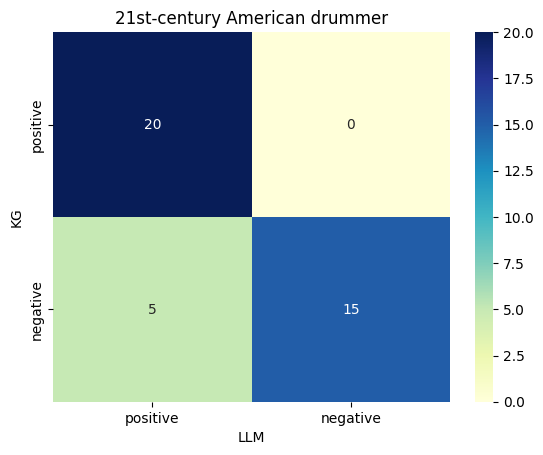

### LLM positive, KG negative

label,description,rationale
Taylor Hanson,"Taylor Hanson is a named individual in the knowledge graph, born in 1983, and is currently living. He is an American male singer who has been active in the 21st century, specializing in pop music. He is also recognized as a singer-songwriter. He is of Danish descent and started his career as a child singer. In addition to singing, Taylor Hanson is a skilled keyboardist and drummer. He has been a part of the music industry since the 20th century, contributing to both pop and rock music as a pianist and songwriter. He began his career as a child pop musician and a child rock musician. Taylor Hanson is a Danish American, originating from Tulsa, Oklahoma. He is recognized for his contributions to the music scene in Tulsa, Oklahoma, and is known as a singer-songwriter from the state. He has also participated in the Smash Hits Poll Winners Party.","Based on the provided definition, Taylor Hanson can be classified as a 21st-century American drummer. The definition of a 21st-century American drummer is an American drummer who has been active during the 21st century. Taylor Hanson fits this definition as he is an American who has been active in the music industry during the 21st century. Furthermore, it is stated that he is a skilled drummer, which aligns with the requirement of being a drummer. Therefore, based on the information provided, Taylor Hanson can be classified as a 21st-century American drummer."
Kris Bergstrom,"Kris Bergstrom, born on July 12, 1976, is a person from Littleton, Colorado. He is a living individual who is recognized as a musical artist, specifically a Shamisen player and a Taiko player. He is also known as a 21st-century drummer. His active years in the music industry began in 2003. In addition to his music career, he is an alumnus of Stanford University. He is associated with multiple places including Littleton, Colorado, Los Angeles, California, Denver, and Los Angeles County, California. His preferred label is ""Kris Bergstrom"" and he is also recognized as the same individual in the DBpedia resource.","Kris Bergstrom fits the definition of a 21st-century American drummer as provided in the concept. He is an American, born in Littleton, Colorado, and has been active in the music industry since 2003, which falls within the 21st century. Furthermore, he is specifically recognized as a drummer, being a Taiko player. Therefore, based on the provided definition and information about Kris Bergstrom, it can be argued that he is a 21st-century American drummer."
Bruno Agra,"Bruno Agra is a named individual, born on September 1, 1980, in Rio de Janeiro, Brazil. He is a living person, known for his work as a musician, specifically as a Brazilian heavy metal drummer and an American hard rock musician. He is associated with the 21st-century drummers and has a significant connection with places, particularly Rio de Janeiro city. Bruno Agra is associated with the bands ""We Are Harlot"" and ""Revolution Renaissance"". His music primarily falls under the genre of rock music. He is also recognized as a person born in the year 1980.","Based on the provided definition, Bruno Agra can be considered a 21st-century American drummer because he is a drummer who has been active during the 21st century. Although he was born in Brazil, he is known as an American hard rock musician, suggesting that he has been active in the American music scene. Therefore, he fits the criteria of being a drummer from America who is active in the 21st century."
Trixie Whitley,"Trixie Whitley is a notable individual, born in 1987, who has made significant contributions to the music industry. She is recognized as a 21st-century American women singer, a Belgian rock singer, and a Belgian drummer. In addition to her musical talents, she is also a 21st-century drummer. Her career has led her to emigrate from Belgium to the United States. She is currently alive and has had the honor of performing at the prestigiou

## Clube Náutico Capibaribe player (http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player)

The entity "Clube Náutico Capibaribe player" is a class within the ontology. It is labeled as "Clube Náutico Capibaribe player" and is a subclass of both "RestrictionHasValue_team_Clube Náutico Capibaribe" and "Footballer in Pernambuco". This indicates that the players classified under this entity are associated with the team "Clube Náutico Capibaribe" and are footballers based in Pernambuco. The information about this entity is derived from the Wikipedia page for "Category:Clube Náutico Capibaribe players". 

There are numerous individuals that fall under this entity. These include footballers such as "Ives", "Marcel (born August 1981)", "Vinícius Eutrópio", "David (born 1982)", "Yuri Mamute", "Claudio Milar", "Gladstone", "Jackson (born 1 May 1990)", "Renaldo", "Daniel Bueno", "Eliomar (born 1987)", "Peter (born 1984)", "Hugo Almeida", "João Ananias", and "Nivaldo (born 1980)". Each of these individuals is classified as a "Clube Náutico Capibaribe player" within the ontology.

### Confusion matrix

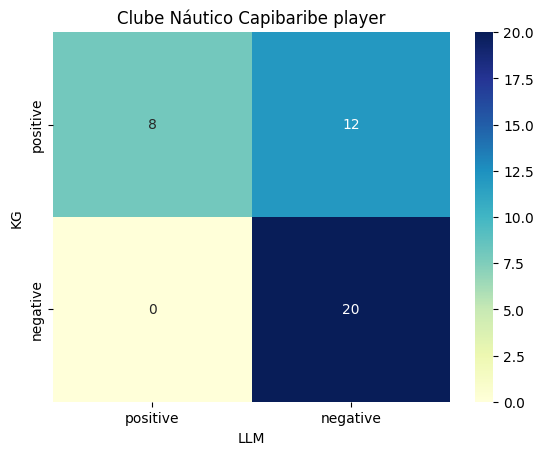

### LLM negative, KG positive

label,description,rationale
Ives (footballer),"Ives is a professional footballer, born in 1985, who hails from Rio de Janeiro, Brazil. He is recognized for his role as a midfielder. His football career is marked by his association with numerous clubs, including Atlético Rio Negro Clube, Audax Rio de Janeiro Esporte Clube, Rio Branco Sport Club, América Futebol Clube (RN), America Football Club (RJ), CR Vasco da Gama, FC Progresul București, Mesquita Futebol Clube, Paraná Clube, Volta Redonda FC, and Madureira Esporte Clube. He has also competed in the Campeonato Brasileiro Série B and Série C leagues. Ives' career extends beyond Brazil, having played football in Romania, which classifies him as a Brazilian expatriate footballer. He is currently living.","The definition of a ""Clube Náutico Capibaribe player"" states that it is a footballer associated with the team ""Clube Náutico Capibaribe"" and based in Pernambuco. However, the information provided about the entity ""Ives (footballer)"" does not mention any association with the team ""Clube Náutico Capibaribe"" or being based in Pernambuco. Therefore, based solely on the information provided in the definition, there is no evidence to support the assertion that ""Ives (footballer)"" is a ""Clube Náutico Capibaribe player""."
Vinícius Eutrópio,"Vinícius Eutrópio is a Brazilian footballer and soccer manager, born in 1966, who is known for his role as a midfielder. He has managed several football clubs including Associação Chapecoense de Futebol, Club Bolívar, Figueirense FC, Paysandu Sport Club, and Santa Cruz Futebol Clube. He has also played for Associação Atlética Internacional (Limeira), Criciúma Esporte Clube, and Figueirense FC. Eutrópio has experience playing in the Campeonato Brasileiro Série B and has lived and worked as a sportsperson in Portugal and the United Arab Emirates. He is a living individual from Minas Gerais and has also managed in the Primeira Liga. He is also recognized as a Brazilian expatriate sportsperson in Portugal and the United Arab Emirates, and an expatriate football manager in the United Arab Emirates.","The assertion that Vinícius Eutrópio is a Clube Náutico Capibaribe player cannot be made based on the information provided in the definition. While Eutrópio is listed as an individual under the entity ""Clube Náutico Capibaribe player"", the description of Eutrópio does not mention any association with the team ""Clube Náutico Capibaribe"". The description only mentions his roles as a player and manager for other football clubs, but not for Clube Náutico Capibaribe. Therefore, based solely on the provided information, it cannot be asserted that Vinícius Eutrópio is a Clube Náutico Capibaribe player."
"David (footballer, born 1982)","David, born in 1982, is a Brazilian footballer who has played as a midfielder for several clubs. He has been a part of Marília Atlético Clube, Club Athletico Paranaense, Fluminense FC, Goiás Esporte Clube, Grêmio Barueri Futebol, Santa Cruz Futebol Clube, América Futebol Clube (MG), Pogoń Szczecin in Poland, Vila Nova Futebol Clube, and Yverdon-Sport FC in Switzerland. He has also participated in the Campeonato Brasileiro Série B. As a Brazilian expatriate, he has played football in both Poland and Switzerland. He is currently alive and continues to contribute to the sport.","The definition provided does not include any information that directly links David (footballer, born 1982) to the Clube Náutico Capibaribe team. The list of teams he has played for does not include Clube Náutico Capibaribe, and he is not mentioned in the list of individuals classified as a ""Clube Náutico Capibaribe player"" within the ontology. Therefore, based solely on the information provided in the definition, there is no basis for the assertion that David (footballer, born 1982) is a Clube Náutico Capibaribe player."
Claudio Milar,"Claudio Milar was a notable football player born in 1974 in Rocha Department, Uruguay and passed away in 2009

## Romania international rugby union player (http://caligraph.org/ontology/Romania_international_rugby_union_player)

The entity "Romania international rugby union player" is a class within an ontology. It is a subclass of two other classes: "International rugby union player" and "Romanian rugby union player". This information was derived from two Wikipedia sources: "Category:Romania international rugby union players" and "List of Romania national rugby union players". 

There are several individuals who are instances of this class, meaning they are identified as Romanian international rugby union players. These individuals include Bucur Alexandru Bucur, Ion Costea, Vladimir Vasile, M. Giucal, Gheorghe Manole, Sorin Fuicu, Vasile Nistor, George Pasache, Vasile Varga, Cătălin Nicolae, Piti (a footballer), Nicolae Răcean, Gabriel Rupanu, and Jody Rose.

### Confusion matrix

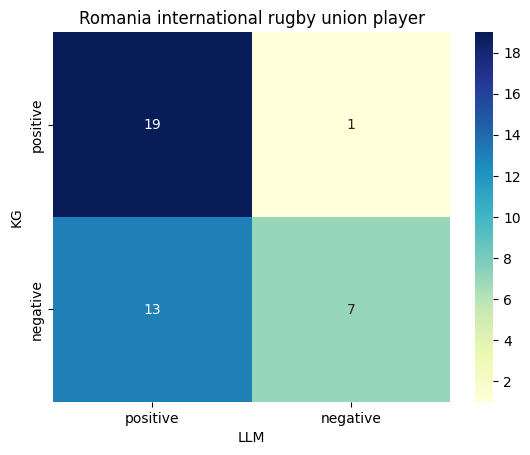

### LLM positive, KG negative

label,description,rationale
Iosif Nemes,"Iosif Nemes is a recognized individual who was born in the year 1903. He is prominently known for his participation in the 1924 Summer Olympics where he won a bronze medal representing Romania in the sport of rugby union. His achievements have categorized him as a Romanian rugby union player and a participant in the rugby union at the 1924 Summer Olympics. He is also recognized as a medalist at the 1924 Summer Olympics. The information about Iosif Nemes has been derived from various categories on Wikipedia, including ""Olympic rugby union players of Romania"", ""Romanian rugby union players"", ""Rugby union players at the 1924 Summer Olympics"", ""1903 births"", ""Medalists at the 1924 Summer Olympics"", and ""Olympic bronze medalists for Romania"". He is also identified as Iosif Nemes in the DBpedia resource.","Based on the provided definition, a Romania international rugby union player is an individual who is recognized as a Romanian rugby union player and has represented Romania in international rugby union games. Iosif Nemes is identified as a Romanian rugby union player, as he has participated in the sport of rugby union representing Romania. His participation in the 1924 Summer Olympics, an international sporting event, further supports this assertion. Therefore, using the information provided in the definition, it can be argued that Iosif Nemes is a Romania international rugby union player."
Gheorghe Gajion,"Gheorghe Gajion is a Moldovan and Romanian rugby union player, recognized as an international player in the sport. He was born in 1992 and is currently alive. He has played for several teams including Stade Aurillacois Cantal Auvergne, Ospreys (rugby union), and Rugby Rovigo Delta. His position in the game is a rugby union prop. Gajion has been part of several transfers including the 2020-21 Pro14 transfer, the 2022-23 Rugby Pro D2 transfer, and the 2018-19 Pro14 transfer. He stands 1.9 meters tall and weighs 133,000 grams. His information is sourced from the category of Romanian rugby union players on Wikipedia.","Gheorghe Gajion fits the definition of a Romania international rugby union player as he is a Romanian rugby union player who has played at an international level. The definition states that a Romania international rugby union player is a subclass of ""International rugby union player"" and ""Romanian rugby union player"". Gajion is a Romanian rugby union player, as indicated by his inclusion in the category of Romanian rugby union players on Wikipedia. He is also an international player, as evidenced by his participation in various international transfers and games for teams such as Stade Aurillacois Cantal Auvergne, Ospreys (rugby union), and Rugby Rovigo Delta. Therefore, based on the provided definition, Gheorghe Gajion can be classified as a Romania international rugby union player."
Teodor Marian,"Teodor Marian is a named individual in the knowledge graph, born in 1904. He is recognized for his achievements in the 1924 Summer Olympics, where he won a bronze medal for Romania. His sport of choice was rugby union, and he represented Romania in this sport at the Olympics. This categorizes him as an Olympic rugby union player for Romania. Beyond his Olympic achievements, he is also classified as a Romanian rugby union player. The information about Teodor Marian was derived from various categories on Wikipedia, including ""Olympic rugby union players of Romania"", ""Romanian rugby union players"", ""Rugby union players at the 1924 Summer Olympics"", ""1904 births"", ""Medalists at the 1924 Summer Olympics"", and ""Olympic bronze medalists for Romania"". He is also linked to the DBpedia resource for Teodor Marian.","Teodor Marian is identified as a Romanian rugby union player who has represented Romania in international competitions, specifically the 1924 Summer Olympics. This aligns with the definition of a ""Romania international rugby union player"" as a player w

### LLM negative, KG positive

label,description,rationale
Piti (footballer),"Piti is a professional footballer, born in 1981, who plays as a winger. He has had an extensive career, playing for several clubs including Ciudad de Murcia, Jamshedpur FC, Novelda CF, UE Tàrrega, AEL Limassol, Granada CF, and Hércules CF. He was also part of the 2019–20 Indian Super League season roster change. Internationally, Piti has represented Catalonia. His career has taken him to various countries, making him an expatriate footballer in Cyprus, Greece, and India. He has played in several leagues such as the Cypriot First Division, Super League Greece, and La Liga in Spain. His status as a foreign football player is recognized in the Cypriot First Division, Super League Greece, and Indian football.","Based on the provided definition and information, there is no valid argument to assert that Piti (footballer) is a Romania international rugby union player. The information provided about Piti indicates that he is a professional footballer who has represented Catalonia internationally and has played in various countries including Cyprus, Greece, and India. There is no mention of him playing rugby union, let alone for Romania. Therefore, based on the available information, Piti cannot be classified as a Romania international rugby union player."


## Member of the European Parliament, 1989–1994 (http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994)

The entity "Member of the European Parliament, 1989–1994" is a class in the ontology. It is a subclass of "Member of the European Parliament 1989–1994". The information about this class was derived from the Wikipedia page "List of members of the European Parliament, 1989–1994". 

This class includes individuals who served as members of the European Parliament between the years 1989 and 1994. Some notable members of this class include Arturo Juan Escuder Croft, Carlos María Bru Purón, Florus Wijsenbeek, Frédéric Rosmini, Nora Mebrak-Zaïdi, Marie-Christine Aulas, Eusebio Cano Pinto, José Manuel Torres Couto, Doris Pack, Jim Fitzsimons, Richard Simmonds, Robert Krieps, Fernando Gomes, Philippe Douste-Blazy, Francisco Sanz Fernández, and Johanna Grund. Each of these individuals is classified under the "Member of the European Parliament, 1989–1994" class in the ontology.

### Confusion matrix

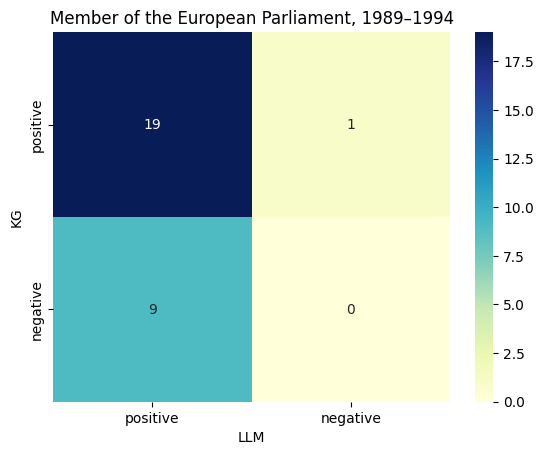

### LLM positive, KG negative

label,description,rationale
Dick Ukeiwé,"Dick Ukeiwé was a notable individual who held several political positions in New Caledonia. He was a Senator of New Caledonia, a New Caledonia politician, and the President of the Congress of New Caledonia. Additionally, he served as a Member of the European Parliament for France from 1989 to 1994. He was also recognized as a Kanak person, a person from the Loyalty Islands, and a Black French politician. Born in 1928 in the Loyalty Islands Province, New Caledonia, he passed away in 2013. The information about Dick Ukeiwé has been derived from various sources, including Wikipedia's pages on Black French politicians, members of the European Parliament for France from 1989 to 1994, and New Caledonia politicians.","The assertion that Dick Ukeiwé is a Member of the European Parliament, 1989–1994 can be supported by the information provided in the description of the entity. According to the description, Dick Ukeiwé served as a Member of the European Parliament for France from 1989 to 1994. This time period aligns with the time frame specified in the definition of the class ""Member of the European Parliament, 1989–1994"". Therefore, based on the information provided, it can be argued that Dick Ukeiwé fits the criteria to be classified under the ""Member of the European Parliament, 1989–1994"" class in the ontology."
Luigi Colani,"Luigi Colani, also known as Colani, Luigi Alberto Colajanni, and Luigi_Colani, was a notable individual born on August 2, 1928. He held dual German and Swiss heritage. Colani was a member of the European Parliament for Italy for two terms, first from 1989 to 1994 and then from 1994 to 1999. His professional career was marked by his contributions to engineering, particularly as a Formula One designer and an aircraft designer. He also gained recognition as a German automobile designer. Beyond his engineering feats, Colani was an artist based in Berlin and was associated with Treptow-Köpenick. He passed away in 2019.","The definition of the class ""Member of the European Parliament, 1989–1994"" includes individuals who served as members of the European Parliament between the years 1989 and 1994. The description of Luigi Colani states that he was a member of the European Parliament for Italy from 1989 to 1994. Therefore, based on the provided definition and the information about Luigi Colani, it can be argued that Luigi Colani is a member of the class ""Member of the European Parliament, 1989–1994""."
Francesco Mottola,"Francesco Mottola, also known as Giuseppe Mottola, was a 20th-century Italian Roman Catholic priest who was born on January 3, 1901. He is recognized as a saint and was declared venerable by Pope Benedict XVI. He was the founder of Catholic religious communities and served as a member of the European Parliament for Italy from 1989 to 1994. He was beatified by Pope Francis, with the beatification officiated by Marcello Semeraro on October 10, 2021, in Tropea, Italy. He died in 1969 and hailed from the Province of Vibo Valentia.","The definition of the class ""Member of the European Parliament, 1989–1994"" includes individuals who served as members of the European Parliament between the years 1989 and 1994. The description of the entity Francesco Mottola states that he served as a member of the European Parliament for Italy from 1989 to 1994. Therefore, based on the provided definition and the information about Francesco Mottola, it can be argued that Francesco Mottola is a member of the class ""Member of the European Parliament, 1989–1994""."
Piet Dankert,"Piet Dankert, born in 1934 and died in 2003, was a notable individual from Leeuwarderadeel, Netherlands. He was a member of the Dutch Labour Party and served as a Member of the European Parliament (MEP) for the Netherlands for two decades from 1979 to 1999. His tenure as an MEP was marked by his service as the President of the European Parliament. In addition to his European Parliament duties, he was als

### LLM negative, KG positive

label,description,rationale
Jim Fitzsimons,"Jim Fitzsimons, born in 1936, is a living individual who has made significant contributions in various fields. He is a Fellow of the Royal Society, having been elected in 1988. Fitzsimons has had a notable political career, serving as a Fianna Fáil MEP and a Member of the European Parliament from 1999 to 2004. He also served as an MEP for the Republic of Ireland for three consecutive terms from 1984 to 2004. In addition to his European Parliament roles, Fitzsimons was a member of the 21st, 22nd, 23rd, and 24th Dáil in Ireland, and held the position of Minister of State of the 23rd Dáil. He also served as the Mayor of Manchester, showcasing his leadership in local governance. Fitzsimons' educational background includes attending St Patrick's Classical School. He is recognized as a person from Navan, a town in Ireland. In the academic field, he held the prestigious title of Master of Gonville and Caius College at the University of Cambridge. This diverse range of roles and achievements highlights Fitzsimons' extensive career in both politics and academia.","Based on the provided definition and information, there is no evidence to support the assertion that Jim Fitzsimons is a Member of the European Parliament, 1989–1994. The information states that Fitzsimons served as a Member of the European Parliament from 1999 to 2004, which is outside the specified time frame of 1989 to 1994. Therefore, we cannot classify him under the ""Member of the European Parliament, 1989–1994"" class in the ontology."


In [20]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)